Task-2: Number Recognition using MNIST Dataset

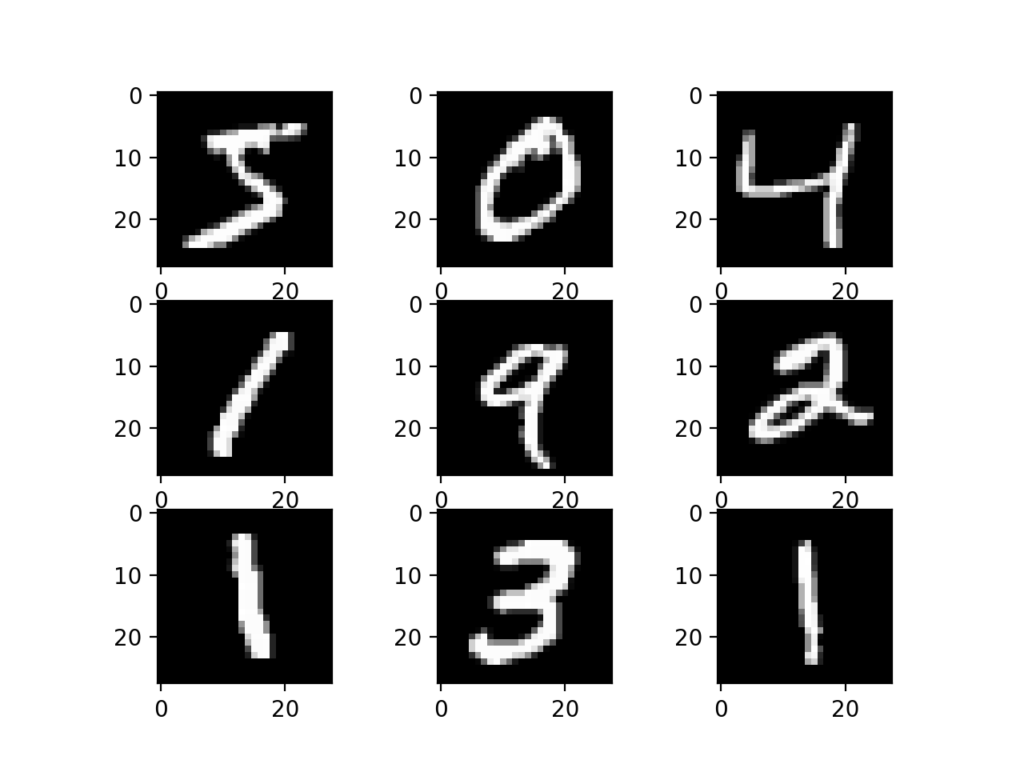

Done by : Somanaboina nandish

Dataset Used : MNIST Number Recognition

Domain : Data Science 📊
Tools used

Google Colab 🖥️

Python Libraries

NumPy 🧮

Pandas 🐼

Tensorflow 🤖

Matplotlib 📈

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Let us import our dataset from Database of Keras Library.
The dataset we are going to use today is MNIST(Modified National Institute of Standards and Technology database).

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As we can see above the each element of the array is pixel of a 28*28 image.
Inorder to display it as an image we'll use Matplotlib's 'matshow' feature.

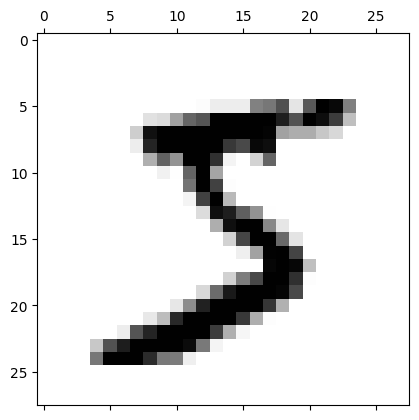

In [7]:
plt.matshow(X_train[0],cmap='binary')
plt.show()

In [8]:
y_train[0]

5

In [9]:
X_train.shape

(60000, 28, 28)

Before we get started we'll scale our elements in the range of [0,1].
For that , we'll divide all the elements of the train and test dataset by 255

In [10]:
X_train=X_train/255
X_test=X_test/255

Let us flatten the array inorder to feed it to the Neural Network.

In [11]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend=X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattend.shape

(60000, 784)

In [13]:
X_train_flattend

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Here we considered a Sequential set of neurons.
In the first layer , we considered all the 784 elements of the array.

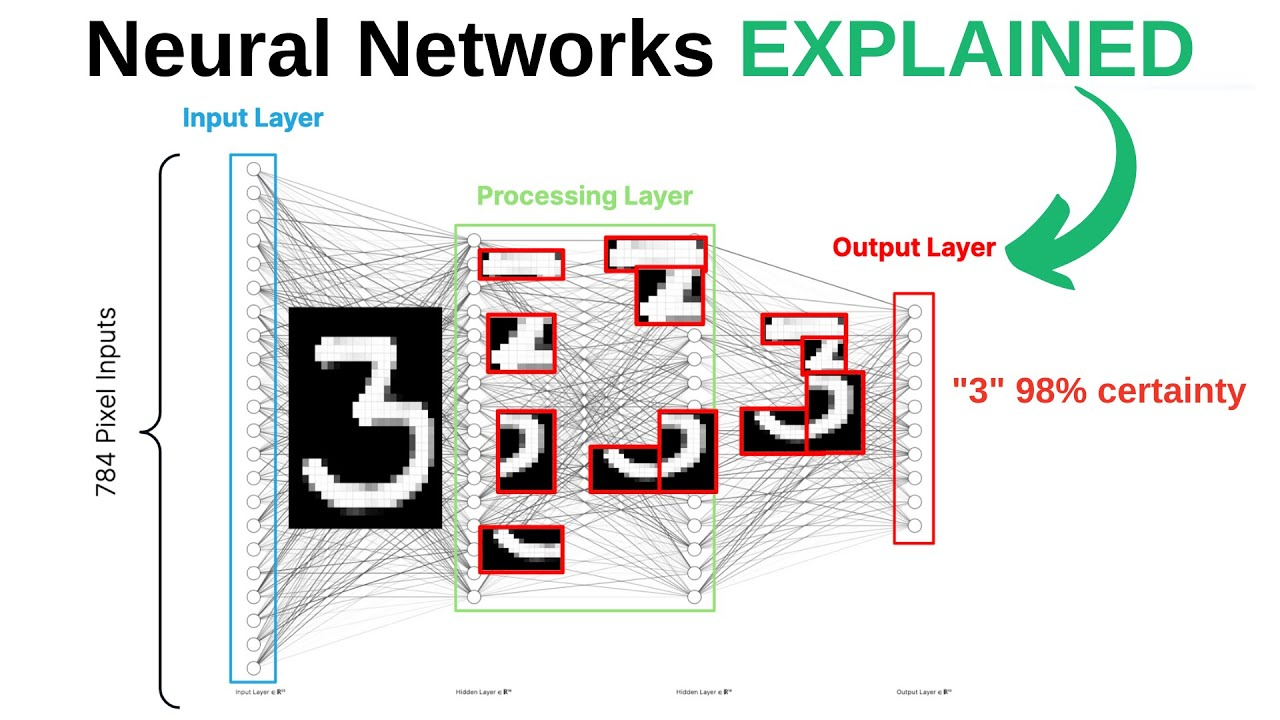

We'll have two hidden layers , where we'll further deduce the individual features of the image and identify it's features individually.
We'll train our model using a Simple Sequential Neural Network , where we use sigmoid function to activate a Dense layer of neurons and map them.

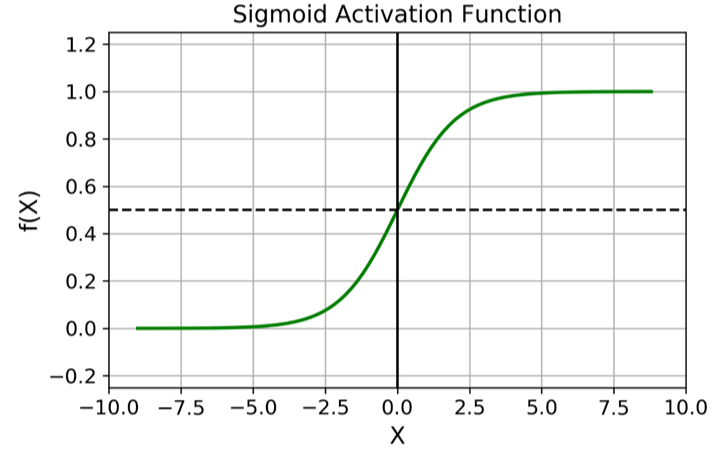

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4686 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9265


We'll evaluate our model using in-built evaluate function.The more the score,the more accurate the function is.

In [15]:
model.evaluate(X_test_flattend,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9258


[0.2687219977378845, 0.9258000254631042]

In [16]:
model.predict(X_test_flattend)

313/313 [==============================] - 1s 1ms/step


array([[1.7535992e-02, 4.3766508e-07, 7.1046330e-02, ..., 9.9983275e-01,
        9.6988320e-02, 6.7306489e-01],
       [3.4082881e-01, 5.5655846e-03, 9.9914134e-01, ..., 1.0879600e-12,
        1.9933268e-01, 1.5325873e-09],
       [4.0052575e-04, 9.9343503e-01, 6.1800528e-01, ..., 1.2942453e-01,
        3.8092673e-01, 3.9532918e-02],
       ...,
       [3.1385810e-06, 3.9507895e-06, 1.1512390e-03, ..., 2.6417109e-01,
        5.6392527e-01, 7.5170726e-01],
       [1.0302351e-04, 1.2237385e-04, 1.3281341e-04, ..., 6.1005074e-05,
        6.1959374e-01, 9.1340931e-05],
       [1.1476389e-02, 5.1605514e-10, 2.2195527e-01, ..., 1.4648428e-08,
        4.2275968e-04, 7.3299572e-07]], dtype=float32)

In [17]:
y_predicted=model.predict(X_test_flattend)
print(y_predicted[0])

313/313 [==============================] - 0s 1ms/step
[1.75359920e-02 4.37665079e-07 7.10463300e-02 9.48813140e-01
 2.02045194e-03 1.10378176e-01 1.16438571e-06 9.99832749e-01
 9.69883204e-02 6.73064888e-01]


Argmax() function :
np.argmax returns the maximum element among the elements present in an array.It is used to predict our final values.

Syntax : np.argmax(element)

In [20]:
np.argmax(y_predicted[2])

1

In [22]:
np.argmax(y_predicted[4])

4

at last we can see all that most of our predictions are correct